In [1]:
import pandas as pd


import datetime

import seaborn as sns

In [9]:
from pathlib import Path

In [11]:
data = []
for path in Path.cwd().glob("*.csv"):
    data.append(pd.read_csv(path, header=None, names = ["affluence","timestamp"]))
    data[-1]["piscine"]=path.stem
data=pd.concat(data)

data["date"] = [datetime.datetime.fromtimestamp(timestamp) for timestamp in data["timestamp"]]
data["weekday"] = [date.strftime("%A") for date in data["date"]]
data["hour"] = [date.hour for date in data["date"]]
data

,affluence,timestamp,piscine,date,weekday,hour
0,5,1.746508e+09,piscine-jeantaris,2025-05-06 07:03:53.437850,Tuesday,7
1,5,1.746508e+09,piscine-jeantaris,2025-05-06 07:13:54.935185,Tuesday,7
2,15,1.746509e+09,piscine-jeantaris,2025-05-06 07:23:55.715940,Tuesday,7
3,20,1.746510e+09,piscine-jeantaris,2025-05-06 07:33:56.707160,Tuesday,7
4,15,1.746510e+09,piscine-jeantaris,2025-05-06 07:43:57.960137,Tuesday,7
...,...,...,...,...,...,...
28,5,1.746528e+09,piscine-aspirand-dunand,2025-05-06 12:44:06.777828,Tuesday,12
29,5,1.746529e+09,piscine-aspirand-dunand,2025-05-06 12:54:10.861725,Tuesday,12
30,5,1.746529e+09,piscine-aspirand-dunand,2025-05-06 13:04:14.200649,Tuesday,13
31,5,1.746530e+09,piscine-aspirand-dunand,2025-05-06 13:14:17.669286,Tuesday,13


data = pd.read_csv("piscine-de-la-butte-aux-cailles.csv", header=None, names = ["affluence","timestamp"])

data["date"] = [datetime.datetime.fromtimestamp(timestamp) for timestamp in data["timestamp"]]
data["weekday"] = [date.strftime("%A") for date in data["date"]]
data["hour"] = [date.hour for date in data["date"]]
data

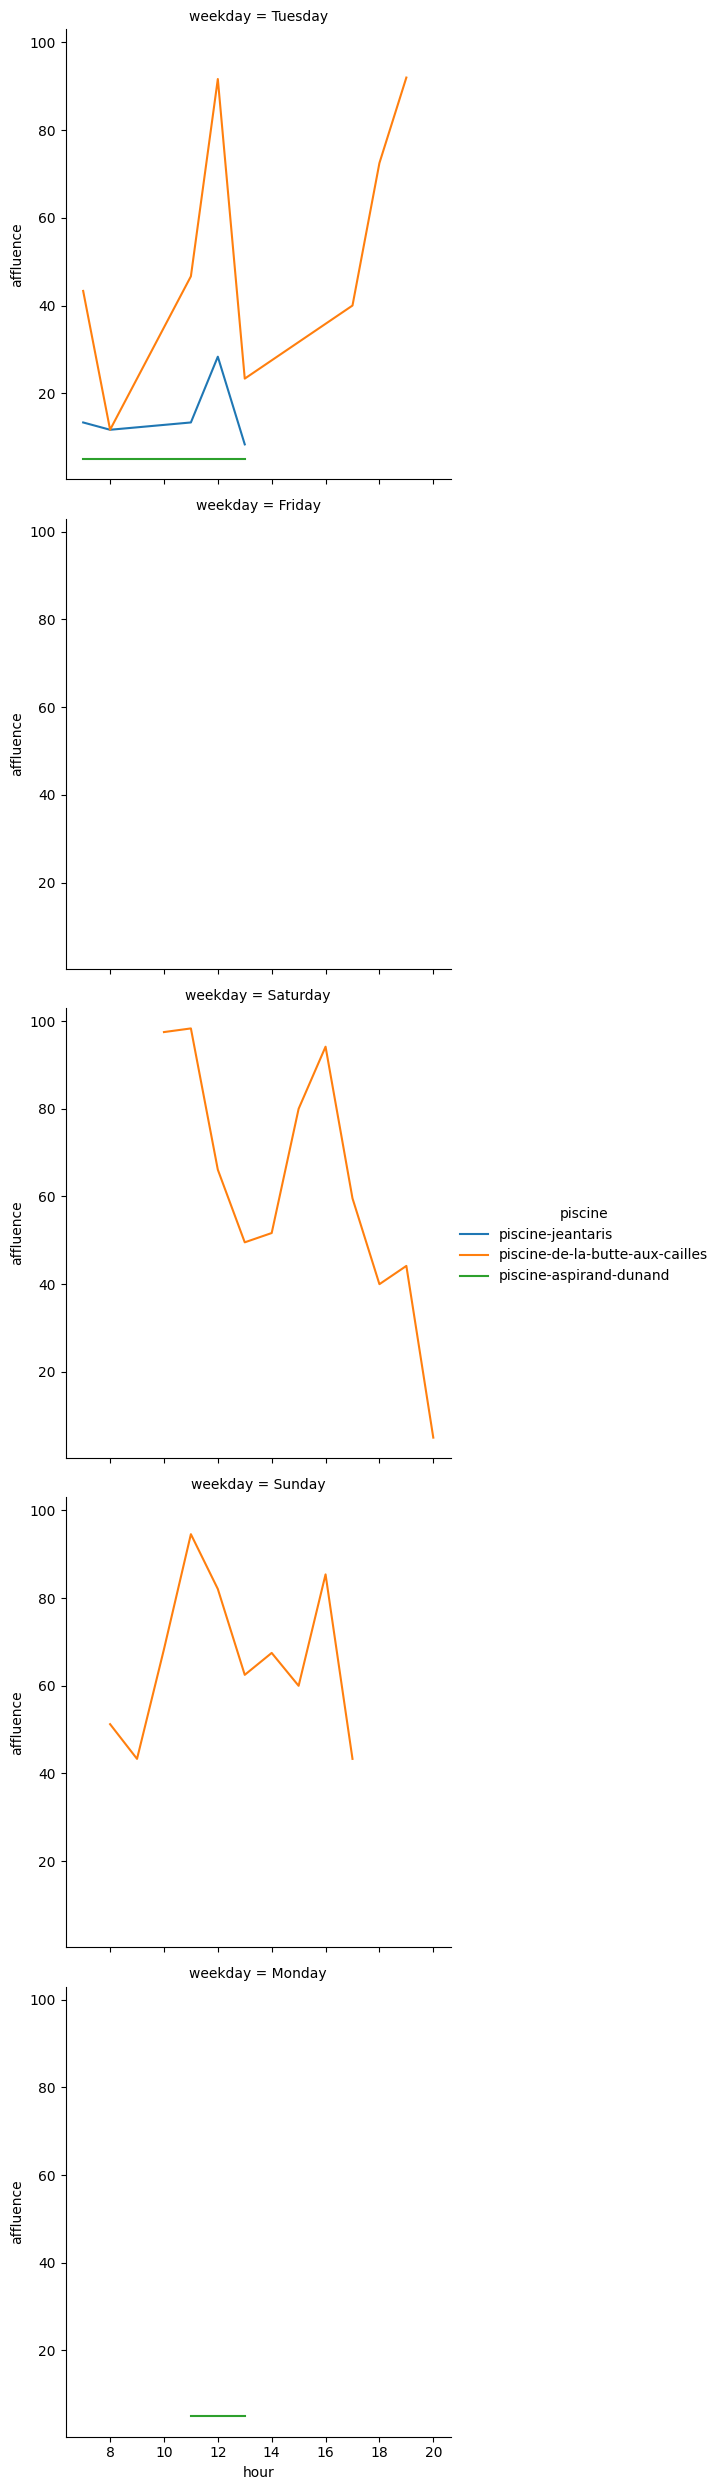

In [13]:
sns.relplot(data, y="affluence", x="hour", row="weekday", kind="line", estimator="mean", errorbar=None, hue="piscine")#)"ci")